Case 1:

>   Bridge A:
    P(jam): 0.09, Reward(jam): -55, Reward(normal): -8, 
>   Bridge B: 
    P(jam): 0.04, Reward(jam): -35, Reward(normal): -6,
    
Case 2:

>   Bridge A:
    P(jam): 0.83, Reward(jam): -46, Reward(normal): -2,
>   Bridge B:
    P(jam): 0.78, Reward(jam): -37, Reward(normal): -27,


In [163]:
import random
import matplotlib.pyplot as plt
from statistics import mean
import numpy as np

In [164]:
def random_choice_two_bridges(APj,ARj,APn,ARn,BPj,BRj,BPn,BRn):
  result = []
  for i in range(1000):  
    bridge = random.choice([1,2])    # choose a bridge
    if bridge == 1:                  # bridge A case 
      prob = random.uniform(0, 1)    # choose aprobability to face a jam
      if prob <= APj: 
        result.append(APj*ARj)       # jam reward
      else:
        result.append(APn*ARn)       # normal reward
    else:                            # bridge B case
      prob = random.uniform(0, 1)    # choose aprobability to face a jam
      if prob <= BPj:
        result.append(BPj*BRj)       # jam reward
      else:
        result.append(BPn*BRn)       # normal reward
  return result

In [165]:
def random_one_bridge(Pj,Rj,Pn,Rn):
  result = []
  for i in range(1000):
    prob = random.uniform(0, 1) # choose aprobability to face a jam
    if prob <= Pj:
      result.append(Pj*Rj)      # jam reward
    else:
      result.append(Pn*Rn)      # normal reward
  return result

this function tries different combinations btw exploration and exploitation in a range of 0 and 1 and calculates a reward only in case if bridge B satisfies the greedy algorithm

In [166]:
def exploration_exploitation_strategy(APj,ARj,APn,ARn,BPj,BRj,BPn,BRn):
  combinations = [0, 0.25, 0.5, 0.75, 1]
  for i in combinations:                  # iterate over probabilities of choosing random action
    if i == 0:
      result1 = core_func(i,APj,ARj,APn,ARn,BPj,BRj,BPn,BRn)
    if i == 0.25:
      result2 = core_func(i,APj,ARj,APn,ARn,BPj,BRj,BPn,BRn)
    if i == 0.5:
      result3 = core_func(i,APj,ARj,APn,ARn,BPj,BRj,BPn,BRn)
    if i == 0.75:
      result4 = core_func(i,APj,ARj,APn,ARn,BPj,BRj,BPn,BRn)
    if i == 1:
      result5 = core_func(i,APj,ARj,APn,ARn,BPj,BRj,BPn,BRn)
      
  iters = 1000
  aver1 = np.zeros(iters)
  aver2 = np.zeros(iters)
  aver3 = np.zeros(iters)
  aver4 = np.zeros(iters)
  aver5 = np.zeros(iters)
  for i, val in enumerate(result1):
    aver1 = aver1 + (val - aver1)/(i+1)
  for i, val in enumerate(result2):
    aver2 = aver2 + (val - aver2)/(i+1)
  for i, val in enumerate(result3):
    aver3 = aver3 + (val - aver3)/(i+1)
  for i, val in enumerate(result4):
    aver4 = aver4 + (val - aver4)/(i+1)
  for i, val in enumerate(result5):
    aver5 = aver5 + (val - aver5)/(i+1)
  plt.figure(figsize=(12,8))
  plt.plot(aver1,label="0%")
  plt.plot(aver2,label="25%")
  plt.plot(aver3,label="50%")
  plt.plot(aver4,label="75%")
  plt.plot(aver5,label="100%")
  plt.legend(bbox_to_anchor=(1.3, 0.5))
  plt.xlabel("Iterations")
  plt.ylabel("Average Reward")
  plt.title("Average Rewards after 1000 Episodes")
  plt.show() 

In [167]:
def core_func(i,APj,ARj,APn,ARn,BPj,BRj,BPn,BRn):
  resultOpt = []
  for j in range(1000):
    prob = random.uniform(0, 1)         # probability that we choose random action
    if prob <= i:                       # if we choose random action
      bridge = random.choice([1,2])     # choose a bridge
      if bridge == 1:                   # bridge A case 
        probB = random.uniform(0, 1)    # choose aprobability to face a jam
        if probB <= APj:
          resultOpt.append(APj*ARj)     # jam reward
        else:
          resultOpt.append(APn*ARn)     # normal reward
      else:                             # bridge B case
        probB = random.uniform(0, 1)    # choose aprobability to face a jam
        if probB <= BPj:
          resultOpt.append(BPj*BRj)     # jam reward
        else:
          resultOpt.append(BPn*BRn)     # normal reward
    else:                               # if we choose greeedy algorithm
      probB = random.uniform(0, 1)      # choose aprobability to face a jam
      if probB <= BPj:
        resultOpt.append(BPj*BRj)       # jam reward
      else:
        resultOpt.append(BPn*BRn)       # normal reward
  print("If the agent chooses a random action ",i*100,"% of the times it will have the average reward:",mean(resultOpt))
  return resultOpt

## Case 1

In [168]:
APj = 0.09
ARj = -55
APn = 1 - APj
ARn = -8

BPj = 0.04
BRj = -35
BPn = 1 - BPj
BRn = -6

##Exploration

First, randomly choose between two bridges and study the avg reward

In [169]:
Random1 = mean(random_choice_two_bridges(APj,ARj,APn,ARn,BPj,BRj,BPn,BRn))

In [170]:
print("the avg result for random choice only is :", Random1)

the avg result for random choice only is : -6.37335


let's suppose we want to choose the bridge with the highest reward of 1000 episodes, calculate the avg reward for each bridge in case if we choose only one of them for running 1000 loop

In [171]:
ResultBridgeA = mean(random_one_bridge(APj,ARj,APn,ARn))

In [172]:
print("the result for bridge A only is:", ResultBridgeA)

the result for bridge A only is: -7.07962


In [173]:
ResultBridgeB = mean(random_one_bridge(BPj,BRj,BPn,BRn))

In [174]:
print("the result for bridge B only is:",ResultBridgeB)

the result for bridge B only is: -5.55508


It seems like the best result we have in case if we choose only bridge B every time

#Exploitation

Now lets decide to choose the bridge with the highest expected reward, based on the following formula: E = P(jam) * Reward(jam) + P(normal) * Reward(normal) 

In [175]:
EA = APj*ARj + APn*ARn
EB = BPj*BRj + BPn*BRn
Emax = max(EA,EB)

In [176]:
resultE = []
if Emax == EA:
  resultE = random_one_bridge(APj,ARj,APn,ARn)
  print("the highest expected reward is on bridge A:", Emax)
if Emax == EB:
  resultE = random_one_bridge(BPj,BRj,BPn,BRn)
  print("the highest expected reward is on bridge B:", Emax)
print("the avg reward is:",mean(resultE))

the highest expected reward is on bridge B: -7.16
the avg reward is: -5.55072


#Exploration-exploitation strategy

Try different combitations btw exploration and exploitation in order to find optimal solution. Try different combinations btw exploration and exploitation in a range of 0 and 1 and calculate reward.

If the agent chooses a random action  0 % of the times it will have the average reward: -5.57252
If the agent chooses a random action  25.0 % of the times it will have the average reward: -5.7997499999999995
If the agent chooses a random action  50.0 % of the times it will have the average reward: -5.93271
If the agent chooses a random action  75.0 % of the times it will have the average reward: -6.14412
If the agent chooses a random action  100 % of the times it will have the average reward: -6.33748


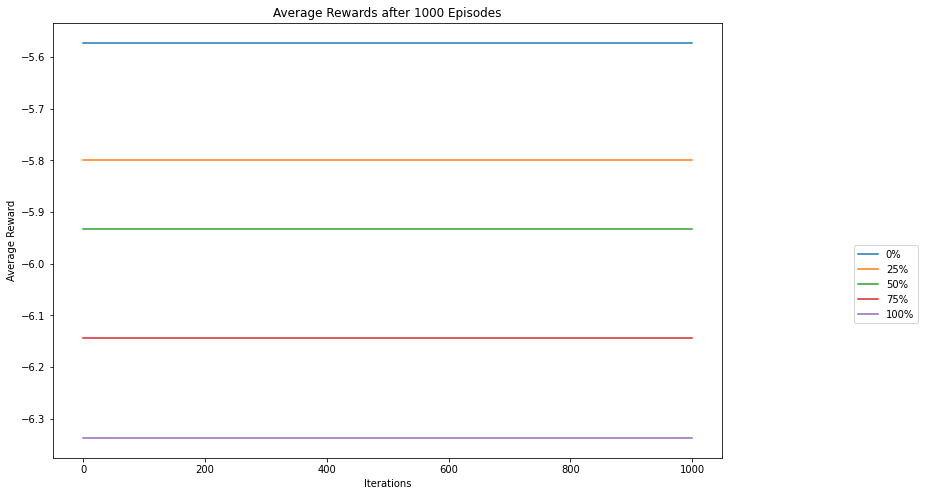

In [177]:
exploration_exploitation_strategy(APj,ARj,APn,ARn,BPj,BRj,BPn,BRn)

That means in case 1 if we choose bridge B all times we will have the highest reward

##Case 2

In [178]:
APj = 0.83
ARj = -46
APn = 1 - APj
ARn = -2

BPj = 0.78
BRj = -37
BPn = 1 - BPj
BRn = -27

##Exploration

First, randomly choose between two bridges and study the avg reward

In [179]:
Random2 = mean(random_choice_two_bridges(APj,ARj,APn,ARn,BPj,BRj,BPn,BRn))

In [180]:
print("the avg result for random choice only is :", Random2)

the avg result for random choice only is : -27.69016


let's suppose we want to choose the bridge with the highest reward of 1000 episodes, calculate the avg reward for each bridge in case if we choose only one of them for running 1000 loop

In [181]:
ResultBridgeA = mean(random_one_bridge(APj,ARj,APn,ARn))

In [182]:
print("the result for bridge A only is:", ResultBridgeA)

the result for bridge A only is: -31.3688


In [183]:
ResultBridgeB = mean(random_one_bridge(BPj,BRj,BPn,BRn))

In [184]:
print("the result for bridge B only is:",ResultBridgeB)

the result for bridge B only is: -24.29892


It seems like the best result we have in case if we choose only bridge B every time

#Exploitation

Now lets decide to choose the bridge with the highest reward, based on the following formula: E = P(jam) * Reward(jam) + P(normal) * Reward(normal) 

In [185]:
EA = APj*ARj + APn*ARn
EB = BPj*BRj + BPn*BRn
Emax = max(EA,EB)

In [186]:
resultE = []
if Emax == EA:
  resultE = random_one_bridge(APj,ARj,APn,ARn)
  print("the highest reward is on bridge A:", Emax)
if Emax == EB:
  resultE = random_one_bridge(BPj,BRj,BPn,BRn)
  print("the highest reward is on bridge B:", Emax)
print("the avg reward is:",mean(resultE))

the highest reward is on bridge B: -34.8
the avg reward is: -24.18432


##Exploration-exploitation strategy

Try different combitations btw exploration and exploitation in order to find optimal solution. Try different combinations btw exploration and exploitation in a range of 0 and 1 and calculate reward.

If the agent chooses a random action  0 % of the times it will have the average reward: -24.321839999999998
If the agent chooses a random action  25.0 % of the times it will have the average reward: -25.22244
If the agent chooses a random action  50.0 % of the times it will have the average reward: -25.437359999999998
If the agent chooses a random action  75.0 % of the times it will have the average reward: -27.4738
If the agent chooses a random action  100 % of the times it will have the average reward: -27.916159999999998


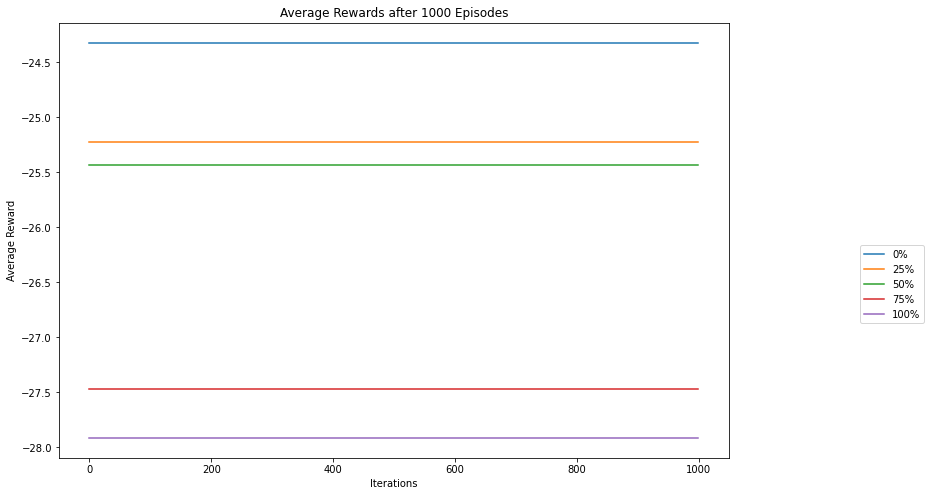

In [187]:
exploration_exploitation_strategy(APj,ARj,APn,ARn,BPj,BRj,BPn,BRn)

That means in case 2 if we choose bridge B all times we will have the highest reward